<a href="https://colab.research.google.com/github/rr-y/Project_7thsem/blob/master/Expression_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131304 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [6]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty
!ls drive/"colab Notebooks"

 apply_alexnet.ipynb   IPP.ipynb			        Untitled1.ipynb
 Emotion-recognition   ipynb				        Untitled2.ipynb
 fer2013.csv	      'Refactored_Py_DS_ML_Bootcamp-master 3'
 FERUFE_V.ipynb        Untitled0.ipynb


In [10]:
cd colab\ Notebooks

/content/drive/colab Notebooks


In [0]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import os
import time
import cv2

In [15]:
ls

 apply_alexnet.ipynb    ipynb
 Emotion-recognition/  'Refactored_Py_DS_ML_Bootcamp-master 3'/
 fer2013.csv            Untitled0.ipynb
 FERUFE_V.ipynb         Untitled1.ipynb
 IPP.ipynb              Untitled2.ipynb


In [0]:
df = pd.read_csv('fer2013.csv')

In [17]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [18]:

df.shape

(35887, 3)

In [19]:
len(df['pixels'])

35887

(48, 48)

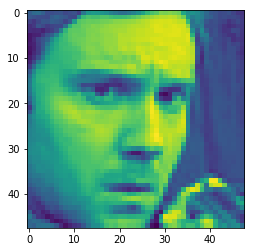

In [20]:
dict 
img_str = df['pixels'][0]
image = [int(x) for x in img_str.split()]
image=np.array(image,dtype='float32').reshape((48,48))
plt.imshow(image)
image.shape

In [21]:
type(df['pixels'][0])

str

In [0]:
image_list = []
for i in range(len(df['pixels'])):
  img = [int(x) for x in df['pixels'][i].split(' ')]
  img1=np.array(img,dtype='uint8').reshape((48,48))
  level = df['emotion'][i]
  dict = {"level":level,"img":img1}
  image_list.append(dict)
 
  

<class 'numpy.ndarray'>


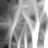

(48, 48)


In [0]:
from google.colab.patches import cv2_imshow
 
  
 
  filters = build_filters()
 
  res1 = process(img, filters)
  cv2_imshow(res1)
  print(res1.shape)

In [0]:
def build_filters():
  filters = []
  ksize = 5
  for theta in np.arange(0, np.pi, np.pi / 16):
      kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
      kern /= 1.5*kern.sum()
      filters.append(kern)
  return filters

def process(img, filters):
  accum = np.zeros_like(img)
  for kern in filters:
    
    fimg = cv2.filter2D(img, cv2.CV_8UC1, kern)
    np.maximum(accum, fimg, accum)
      
  return accum


In [0]:
label = []
features = []
for i in range(len(image_list)):
  filters = build_filters()
  res1 = process(image_list[i]["img"], filters)
  features.append(res1)
  label.append(image_list[i]["level"])
  

In [58]:
label = np.array(label).reshape(35887,1)
features = np.array(features)
features = features.reshape(-1,48*48)
features.shape


(35887, 2304)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.40, random_state=35)

In [60]:
print(X_train[0].shape)

(2304,)


In [61]:
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr')
clf.fit(X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_predict = clf.predict(X_test)


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.42500870776732846

In [0]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,y_predict)

array([[   9,    0,    3, 1903,   10,   19,    4],
       [   1,    0,    1,  211,    0,    5,    0],
       [   6,    0,    3, 1996,   14,   32,    1],
       [   7,    0,    2, 3553,    6,   21,    1],
       [   8,    0,    5, 2376,   18,   21,    1],
       [  12,    0,    3, 1543,    3,   54,    0],
       [   3,    0,    5, 2461,   13,   18,    3]])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
